In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from numpy import median
import numpy.ma as ma
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy import signal 
import cPickle as pkl
import itertools as it
from lab.classes.dbclasses import dbMouse

In [2]:
%run Helper_Functions.ipynb

In [3]:
mouseID = 'bv140'
mouse = dbMouse(mouseID)

expt = mouse.imagingExperiments()[7]
roi_label = 'all_fissa'
imData = np.squeeze(expt.imagingData(dFOverF = 'from_file', label = roi_label))

velocity = expt.velocity(smoothing = 'hanning', window_length = 5)[0]
labels = pd.read_excel('/data2/bert/CA3/Histology/Subtypes.xlsx', sheet_name = mouseID)

velocity = velocity[512:1921]
putative_intervals = find_putative_run_intervals(velocity, velocity_cut_off = 0.2)
int1 = merge_nearby_intervals(putative_intervals)
int2 = remove_short_intervals(int1)
final_intervals = remove_small_amplitude_intervals(velocity,int2)

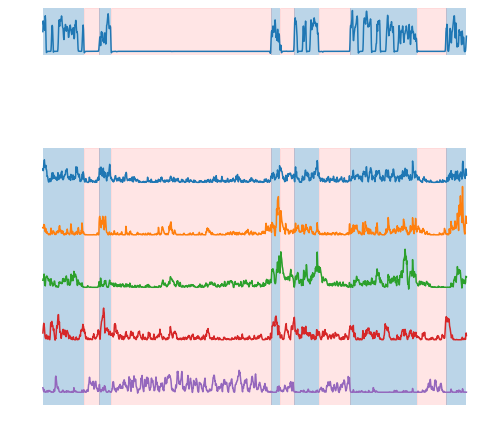

In [4]:
fig = plt.figure(figsize = (7, 6))
gs = gridspec.GridSpec(6, 1, figure = fig)
fig_ax1 = fig.add_subplot(gs[0:1,:])
fig_ax1.plot(velocity)
for i in range(final_intervals.shape[0]-1):
    fig_ax1.axvspan(final_intervals[i][0], final_intervals[i][1], alpha = 0.3)
    fig_ax1.axvspan(final_intervals[i][1], final_intervals[i+1][0], color = 'red', alpha = 0.1)
fig_ax1.axvspan(final_intervals[-1][0], final_intervals[-1][1], alpha = 0.3)
fig_ax1.axis('off')
simpleaxis(fig_ax1)

fig_ax2 = fig.add_subplot(gs[2:,:])
fig_ax2.plot(imData[21][512:1921] - 1) # PVBC
fig_ax2.plot(imData[18][512:1921] - 2) # AAC
fig_ax2.plot(imData[41][512:1921] - 3) # SOM
fig_ax2.plot(imData[2][512:1921] - 4)  # CCK
fig_ax2.plot(imData[9][512:1921] - 5)  # CB
for i in range(final_intervals.shape[0]-1):
    fig_ax2.axvspan(final_intervals[i][0], final_intervals[i][1], alpha = 0.3)
    fig_ax2.axvspan(final_intervals[i][1], final_intervals[i+1][0], color = 'red', alpha = 0.1)
fig_ax2.axvspan(final_intervals[-1][0], final_intervals[-1][1], alpha = 0.3)
fig_ax2.axis('off')
simpleaxis(fig_ax2)

fig.tight_layout()
plt.savefig('Example_Traces.svg', format = 'svg', dpi = 1200, transparent = True)